# Wrangling

I began reviewing and analyzing hate crimes data from the Austin PD datasets available at https://data.austintexas.gov in January of 2020. This is the first book of the analysis series, which will be updated frequently. In this notebook, I will load and complete the first stage of scrubbing the data, with some visualizations for guidance. 

In [1]:
import pandas as pd 
import glob
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
# reading in the datasets
path = r'C:\Users\Robert\OneDrive\Desktop\hate_crimes'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

In [3]:
# Concatenate all sets into one
df = pd.concat(dfs, ignore_index=True)

C:\Users\Robert\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [4]:
pd.set_option('display.max_columns', None)


# Examining the new dataset
display(df.shape)
print('----------------------------------')
display(df.head())
print('----------------------------------')
display(df.tail())
print('----------------------------------')
display(df.info())
print('----------------------------------')
display(df.isnull().sum())
print('----------------------------------')
display(df.index)
print('----------------------------------')
display(df.columns)
print('----------------------------------')
display(df.describe())

(59, 21)

----------------------------------


,Bias,Bias,Date of Incident,Date of Incident/Day of Week,Day of Week,Incident Number,Month,Notes,Number of Offenders over 18,Number of Offenders under 18,Number of Victims Over 18,Number of Victims over 18,Number of Victims under 18,Number of vitims under 18,Offense,Offense Location,Offense(s),Race or Ethnic of Offender,Race/Ethnic of Offender(s),Race/Ethnicity of Offenders,Victim Type
0,Anti-Black or African American,NaN,NaN,01/01/2017/Sun,NaN,2017-241137,January,NaN,1,0,1.0,NaN,NaN,0.0,Aggravated Assault,Park/Playground,NaN,White/Not Hispanic,NaN,NaN,Individual
1,Anti-White,NaN,NaN,02/01/2017/Wed,NaN,2017-580344,February,NaN,1,0,1.0,NaN,NaN,0.0,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,NaN,Black or African American/Not Hispanic,NaN,NaN,Individual
2,Anti-Jewish,NaN,NaN,03/21/2017/Tues,NaN,2017-800291,March,NaN,0,0,0.0,NaN,NaN,0.0,Destruction,Highway/Road/Alley/Street/Sidewalk,NaN,Unknown,NaN,NaN,Other
3,Anti-Jewish,NaN,NaN,04/12/2017/Wed,NaN,2017-1021534,April,NaN,0,0,0.0,NaN,NaN,0.0,Simple Assault,Air/Bus/Train Terminal,NaN,White/Unknown,NaN,NaN,Individual
4,Anti-Gay (Male),NaN,NaN,05/15/2017/Mon,NaN,2017-1351550,May,NaN,2,1,0.0,NaN,NaN,1.0,Simple Assault,Residence/Home,NaN,White/Not Hispanic,NaN,NaN,Individual


----------------------------------


,Bias,Bias,Date of Incident,Date of Incident/Day of Week,Day of Week,Incident Number,Month,Notes,Number of Offenders over 18,Number of Offenders under 18,Number of Victims Over 18,Number of Victims over 18,Number of Victims under 18,Number of vitims under 18,Offense,Offense Location,Offense(s),Race or Ethnic of Offender,Race/Ethnic of Offender(s),Race/Ethnicity of Offenders,Victim Type
54,NaN,Anti-Hispanic or Latino,5/20/2020,NaN,Wednesday,2020-1410411,May,NaN,1,0,NaN,1.0,0.0,NaN,NaN,Streets/Highway/Road/Alley,Assault with Injury,NaN,NaN,White/Non-Hispanic,NaN
55,NaN,Anti-Black or African American,6/4/2020,NaN,Thursday,2020-1560947,June,NaN,1,0,NaN,1.0,0.0,NaN,NaN,Residence/Home,Criminal Mischief,NaN,NaN,Unknown,NaN
56,NaN,Anti-Black or African American,6/9/2020,NaN,Tuesday,2020-1610708,June,NaN,1,0,NaN,1.0,0.0,NaN,NaN,Streets/Highway/Road/Alley,Criminal Mischief,NaN,NaN,Unknown,NaN
57,NaN,Anti-Black or African American,6/17/2020,NaN,Wednesday,2020-1690572,June,NaN,1,0,NaN,1.0,0.0,NaN,NaN,Parking Lot,Criminal Mischief,NaN,NaN,Unknown,NaN
58,NaN,Anti-Black or African American,6/23/2020,NaN,Tuesday,2020-1750961,June,NaN,1,0,NaN,1.0,0.0,NaN,NaN,Streets/Highway/Road/Alley,Criminal Mischief,NaN,NaN,Unknown,NaN


----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 21 columns):
    Bias                        36 non-null object
Bias                            23 non-null object
Date of Incident                23 non-null object
Date of Incident/Day of Week    36 non-null object
Day of Week                     23 non-null object
Incident Number                 59 non-null object
Month                           59 non-null object
Notes                           2 non-null object
Number of Offenders over 18     59 non-null int64
Number of Offenders under 18    59 non-null int64
Number of Victims Over 18       36 non-null float64
Number of Victims over 18       23 non-null float64
Number of Victims under 18      23 non-null float64
Number of vitims under 18       36 non-null float64
Offense                         17 non-null object
Offense Location                59 non-null object
Offense(s)                      42 non-null o

None

----------------------------------


    Bias                        23
Bias                            36
Date of Incident                36
Date of Incident/Day of Week    23
Day of Week                     36
Incident Number                  0
Month                            0
Notes                           57
Number of Offenders over 18      0
Number of Offenders under 18     0
Number of Victims Over 18       23
Number of Victims over 18       36
Number of Victims under 18      36
Number of vitims under 18       23
Offense                         42
Offense Location                 0
Offense(s)                      17
Race or Ethnic of Offender      42
Race/Ethnic of Offender(s)      40
Race/Ethnicity of Offenders     36
Victim Type                     23
dtype: int64

----------------------------------


RangeIndex(start=0, stop=59, step=1)

----------------------------------


Index(['    Bias', 'Bias', 'Date of Incident', 'Date of Incident/Day of Week',
       'Day of Week', 'Incident Number', 'Month', 'Notes',
       'Number of Offenders over 18', 'Number of Offenders under 18',
       'Number of Victims Over 18', 'Number of Victims over 18',
       'Number of Victims under 18', 'Number of vitims under 18', 'Offense',
       'Offense Location', 'Offense(s)', 'Race or Ethnic of Offender',
       'Race/Ethnic of Offender(s)', 'Race/Ethnicity of Offenders',
       'Victim Type'],
      dtype='object')

----------------------------------


,Number of Offenders over 18,Number of Offenders under 18,Number of Victims Over 18,Number of Victims over 18,Number of Victims under 18,Number of vitims under 18
count,59.000000,59.000000,36.000000,23.000000,23.000000,36.000000
mean,1.033898,0.118644,0.861111,1.000000,0.043478,0.055556
std,0.787096,0.494269,0.424451,0.301511,0.208514,0.232311
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,4.000000,3.000000,2.000000,2.000000,1.000000,1.000000


In [5]:
df.set_index(['Incident Number'], inplace=True)
df.sort_index(inplace=True)

display(df.index)
print('----------------------------------')
display(df.head())
print('----------------------------------')
display(df.tail())

Index(['2017-1021534', '2017-1351550', '2017-1550219', '2017-1660914',
       '2017-1681488', '2017-1820275', '2017-1862526', '2017-2011198',
       '2017-2020124', '2017-241137', '2017-2880227', '2017-2971392',
       '2017-3141125', '2017-3200108', '2017-5043049', '2017-580344',
       '2017-800291', '2018-120696', '2018-1410057', '2018-1671923',
       '2018-1791666', '2018-200595', '2018-2250662', '2018-251458',
       '2018-2521623', '2018-2531786', '2018-2840756', '2018-2921720',
       '2018-3491016', '2018-400447', '2018-5033471', '2018-530804',
       '2018-611809', '2018-651279', '2018-670117', '2018-911582',
       '2019-1621946', '2019-190201', '2019-2181959', '2019-2240026',
       '2019-2351905', '2019-3271657', '2019-3531078', '2019-3641765',
       '2019-531028', '2019-8000242', '2019-901579', '2019-941819',
       '2020-1381131', '2020-1410411', '2020-1560947', '2020-1610708',
       '2020-1690572', '2020-1750961', '2020-5011788', '2020-5015689',
       '2020-5016804',

----------------------------------


,Bias,Bias,Date of Incident,Date of Incident/Day of Week,Day of Week,Month,Notes,Number of Offenders over 18,Number of Offenders under 18,Number of Victims Over 18,Number of Victims over 18,Number of Victims under 18,Number of vitims under 18,Offense,Offense Location,Offense(s),Race or Ethnic of Offender,Race/Ethnic of Offender(s),Race/Ethnicity of Offenders,Victim Type
Incident Number,,,,,,,,,,,,,,,,,,,,
2017-1021534,Anti-Jewish,NaN,NaN,04/12/2017/Wed,NaN,April,NaN,0,0,0.0,NaN,NaN,0.0,Simple Assault,Air/Bus/Train Terminal,NaN,White/Unknown,NaN,NaN,Individual
2017-1351550,Anti-Gay (Male),NaN,NaN,05/15/2017/Mon,NaN,May,NaN,2,1,0.0,NaN,NaN,1.0,Simple Assault,Residence/Home,NaN,White/Not Hispanic,NaN,NaN,Individual
2017-1550219,Anti-Gay (Male),NaN,NaN,06/04/2017/Sun,NaN,June,NaN,2,0,1.0,NaN,NaN,0.0,Simple Assault,Highway/Road/Alley/Street/Sidewalk,NaN,White/Unknown,NaN,NaN,Individual
2017-1660914,Anti-Hispanic or Latino,NaN,NaN,6/15/2017/Thurs,NaN,June,NaN,1,0,1.0,NaN,NaN,0.0,Intimidation,Bank/Savings and Loan,NaN,White/Not Hispanic,NaN,NaN,Individual
2017-1681488,Anti-Black or African American,NaN,NaN,06/17/2017/Sat,NaN,June,NaN,1,0,1.0,NaN,NaN,0.0,Simple Assault,Highway/Road/Alley/Street/Sidewalk,NaN,White/Not Hispanic,NaN,NaN,Individual


----------------------------------


,Bias,Bias,Date of Incident,Date of Incident/Day of Week,Day of Week,Month,Notes,Number of Offenders over 18,Number of Offenders under 18,Number of Victims Over 18,Number of Victims over 18,Number of Victims under 18,Number of vitims under 18,Offense,Offense Location,Offense(s),Race or Ethnic of Offender,Race/Ethnic of Offender(s),Race/Ethnicity of Offenders,Victim Type
Incident Number,,,,,,,,,,,,,,,,,,,,
2020-5011788,NaN,Anti-Gay (Male); Anti-Jewish,3/22/2020,NaN,Sunday,March,NaN,0,0,NaN,1.0,0.0,NaN,NaN,Residence/Home,Criminal Mischief,NaN,NaN,Unknown,NaN
2020-5015689,NaN,Anti-Buddhist,4/20/2020,NaN,Monday,April,NaN,0,0,NaN,1.0,0.0,NaN,NaN,Church/Synagogue/Temple/Mosque,Criminal Mischief,NaN,NaN,Unknown,NaN
2020-5016804,NaN,Anti-Gay (Male); Anti-Transgender,4/29/2020,NaN,Wednesday,April,NaN,1,0,NaN,1.0,0.0,NaN,NaN,Department/Discount Store,Assault by Threat,NaN,NaN,Black/Non-Hispanic,NaN
2020-602085,NaN,Anti-Black or African American,3/1/2020,NaN,Sunday,March,NaN,1,0,NaN,1.0,0.0,NaN,NaN,Residence/Home,Criminal Mischief,NaN,NaN,White/Non-Hispanic,NaN
2020-680226,NaN,Anti-Gay (Male); Anti-Transgender,3/8/2020,NaN,Sunday,March,NaN,2,0,NaN,1.0,0.0,NaN,NaN,Parking Lot,Assault,NaN,NaN,White/Hispanic,NaN


In [6]:
# Examining the bias columns
display(df['    Bias'].value_counts())
display(df['Bias'].value_counts())

Anti-Black                        8
Anti-Gay (Male)                   5
Anti-Black or African American    5
Anti-Hispanic                     3
Anti-Islamic (Muslim)             2
Anti-White                        2
Anti-Hispanic or Latino           2
Anti-Gay                          2
Anti-Transgender                  2
Anti-Jewish                       2
Anti-Arab                         1
Anti-Disability                   1
Anti-Lesbian                      1
Name:     Bias, dtype: int64

Anti-Black or African American       9
Anti-Gay (Male)                      5
Anti-Gay (Male); Anti-Transgender    2
Anti-Gay (Male); Anti-Jewish         1
Anti-Buddhist                        1
Anti-White                           1
Anti-Hispanic or Latino              1
Anti-Islamic(Muslim)                 1
Anti-Hispanic/Latino                 1
Anti-Jewish                          1
Name: Bias, dtype: int64

So it appears the staff and officers at Austin PD may have trouble with maintaining uniformity of their data. Notice how columns of data are duplicated with slightly different names and data formats? We'll have to clean this up big time before we can do any analysis.

,Number of Offenders over 18,Number of Offenders under 18,Number of Victims Over 18,Number of Victims over 18,Number of Victims under 18,Number of vitims under 18
Number of Offenders over 18,1.000000,-0.187788,0.199117,0.635223,-0.249601,0.181902
Number of Offenders under 18,-0.187788,1.000000,-0.244048,-0.722999,1.000000,0.240098
Number of Victims Over 18,0.199117,-0.244048,1.000000,NaN,NaN,-0.499027
Number of Victims over 18,0.635223,-0.722999,NaN,1.000000,-0.722999,NaN
Number of Victims under 18,-0.249601,1.000000,NaN,-0.722999,1.000000,NaN
Number of vitims under 18,0.181902,0.240098,-0.499027,NaN,NaN,1.000000


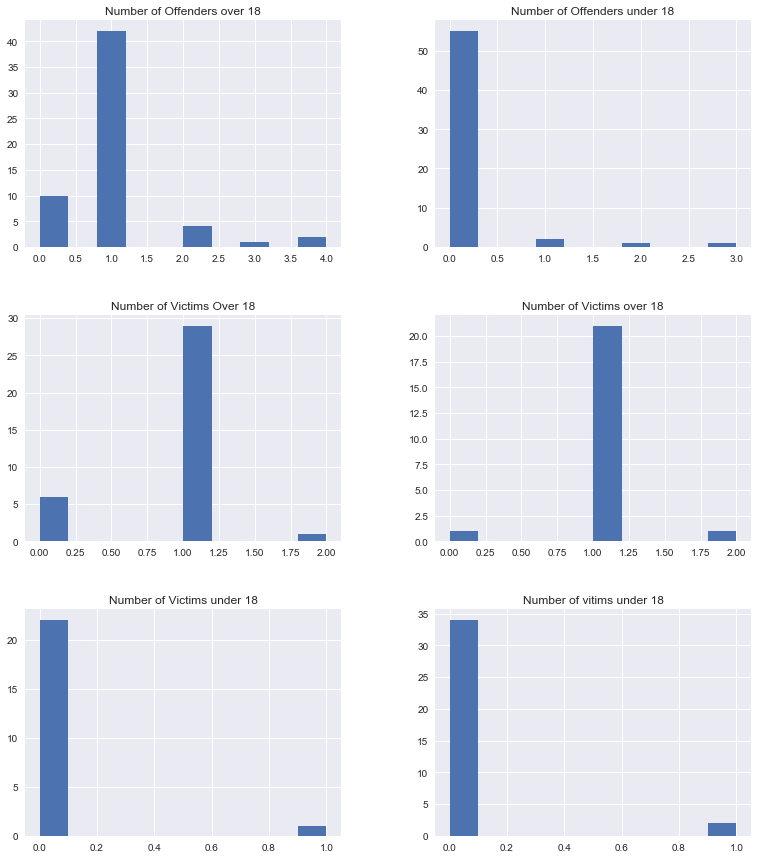

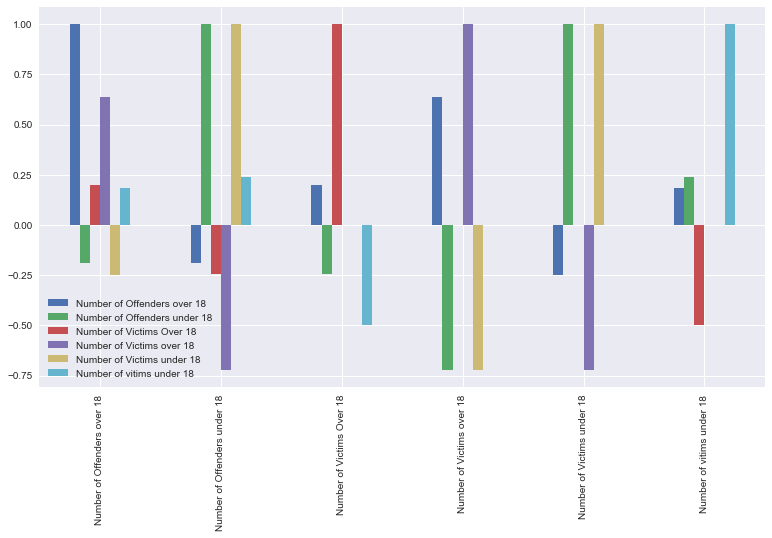

In [7]:
# Examining rough histograms & rough correlations
df.hist(figsize=(13,15))

corr = df.corr()
display(corr)

corr.plot.bar(figsize=(13,7))
plt.show()

In [8]:
# Saving concatented set for next notebook
df.to_csv(r"C:\Users\Robert\OneDrive\Desktop\aus_concat.csv")